In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


mouse_metadata_path = "/Users/trevormcdonough/Downloads/Starter_Code-7/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/trevormcdonough/Downloads/Starter_Code-7/Pymaceuticals/data/Study_results.csv"

# Reading the mouse data and the study results and setting up the DataFrame
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_and_study_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how = "left")

mouse_and_study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_and_study_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_and_study_data[mouse_and_study_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Getting all the data for the duplicate mouse ID. 
duplicate_data = mouse_and_study_data[mouse_and_study_data['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_and_study_data = mouse_and_study_data.drop(mouse_and_study_data[mouse_and_study_data['Mouse ID'] == 'g989'].index)
clean_mouse_and_study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_cleaned = clean_mouse_and_study_data["Mouse ID"].nunique()
mouse_count_cleaned

248

In [7]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_data = clean_mouse_and_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean = drug_group_data.mean()
median = drug_group_data.median()
variance = drug_group_data.var()
std_deviation = drug_group_data.std()
ste = drug_group_data.sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Standard Deviation': std_deviation,
    'Tumor Volume Std. Err.': ste
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_mouse_and_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


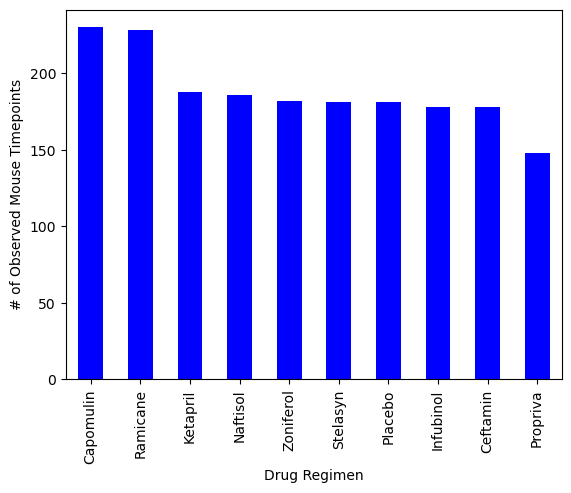

In [9]:
#Pandas Bar Chart
bar_chart1 = clean_mouse_and_study_data['Drug Regimen'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

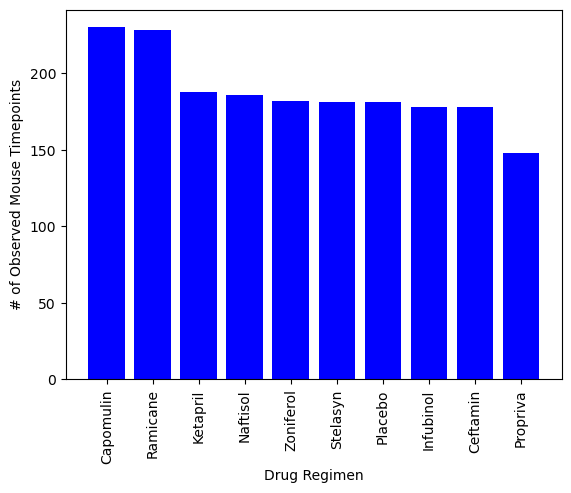

In [11]:
#PyPlot
barchart2 = clean_mouse_and_study_data['Drug Regimen'].value_counts()
plt.bar(barchart2.index, barchart2.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

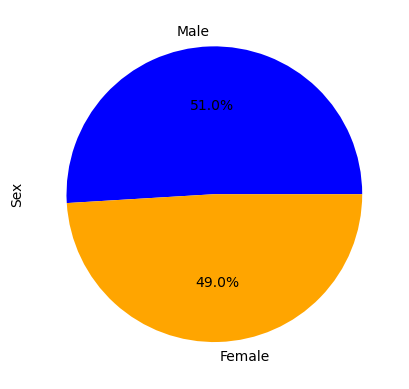

In [12]:
Pie_chart_pandas = clean_mouse_and_study_data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('Sex')
plt.show()

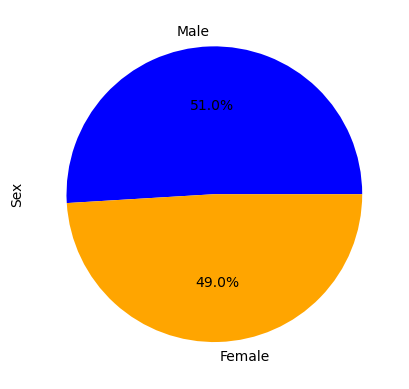

In [15]:
pie_chart_pyplot = clean_mouse_and_study_data['Sex'].value_counts()
plt.pie(pie_chart_pyplot.values, labels=pie_chart_pyplot.index, autopct= '%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('Sex')
plt.show()

In [16]:
# Starting by getting the last (greatest) timepoint for each mouse


last_timepoint = clean_mouse_and_study_data.groupby('Mouse ID')['Timepoint'].max()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_data = pd.merge(last_timepoint, clean_mouse_and_study_data, on=['Mouse ID', 'Timepoint'], how='left')

In [17]:
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_data = final_tumor_data[final_tumor_data['Drug Regimen'].isin(treatment_regimens)]

In [21]:


tumor_data = {}

# Looping through each treatment
for treatment in treatment_regimens:
    treatment_data = final_tumor_data[final_tumor_data['Drug Regimen'] == treatment] 
    tumor_data[treatment] = treatment_data['Tumor Volume (mm3)']
    quartiles = treatment_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_quar = quartiles[0.25]
    upper_quar = quartiles[0.75]
    iqr = upper_quar - lower_quar
    
    # Determining outliers using upper and lower bounds
    lower_bound = lower_quar - (1.5 * iqr)
    upper_bound = upper_quar + (1.5 * iqr)

    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s potential outliers:")
    if outliers.empty:
        print("No Potential Outliers")
    else:
        print(outliers)

Capomulin's potential outliers:
No Potential Outliers
Ramicane's potential outliers:
No Potential Outliers
Infubinol's potential outliers:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  
Ceftamin's potential outliers:
No Potential Outliers


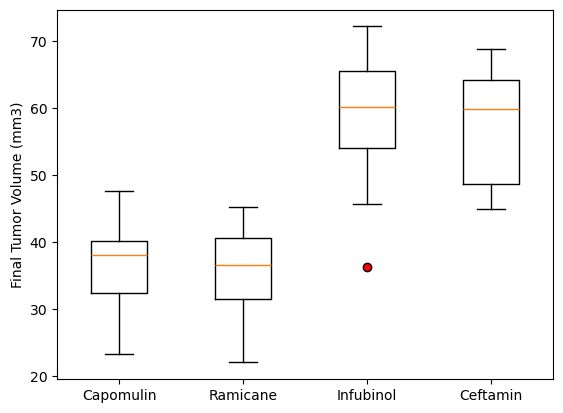

In [25]:
# Creating a box and whisker plot to show the outlier
boxplot = [tumor_data[treatment] for treatment in treatment_regimens]
plt.boxplot(boxplot, labels=treatment_regimens, flierprops=dict(marker='o', markerfacecolor='red'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

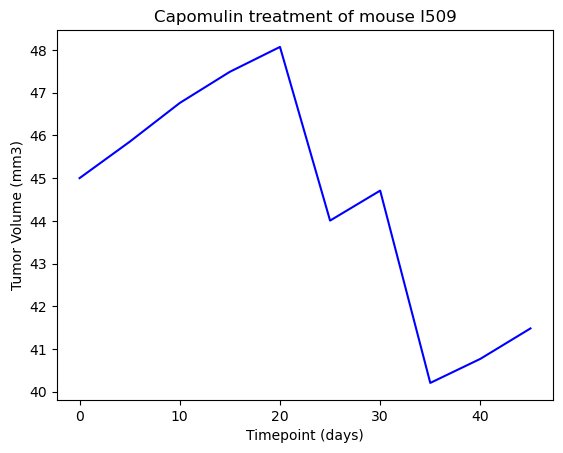

In [27]:
# Filtering the data for Capomulin treatment regimen
capomulin_data = clean_mouse_and_study_data[clean_mouse_and_study_data['Drug Regimen'] == 'Capomulin']

mouse_L509_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Ploting tumor volume vs. time point for mouse I509 treated with Capomulin
plt.plot(mouse_L509_data['Timepoint'], mouse_L509_data['Tumor Volume (mm3)'], color='blue')
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

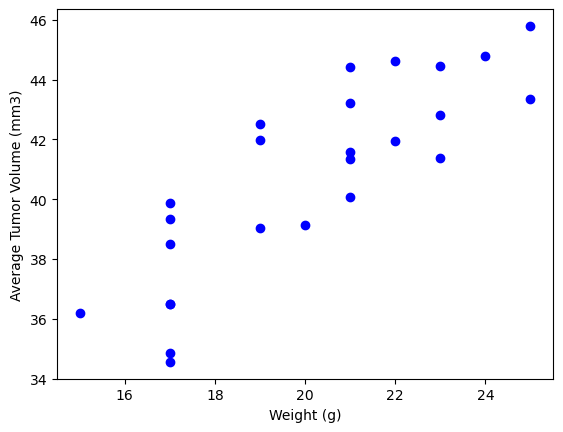

In [28]:
capomulin_avg_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merging the calculated average tumor volume with the mouse metadata DataFrame to include mouse weight
capomulin_avg_tumor = capomulin_avg_tumor.reset_index()
capomulin_avg_tumor = pd.merge(capomulin_avg_tumor, mouse_metadata, on='Mouse ID', how='left')

# Ploting mouse weight vs. average tumor volume
plt.scatter(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [31]:
correlation_coefficient, _ = st.pearsonr(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)

#Assigning linear regression stats 
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'])

print(f"Linear Regression Model: {slope}x + {intercept}")


Correlation Coefficient: 0.8419363424694721
Linear Regression Model: 0.9544396890241049x + 21.552160532685008


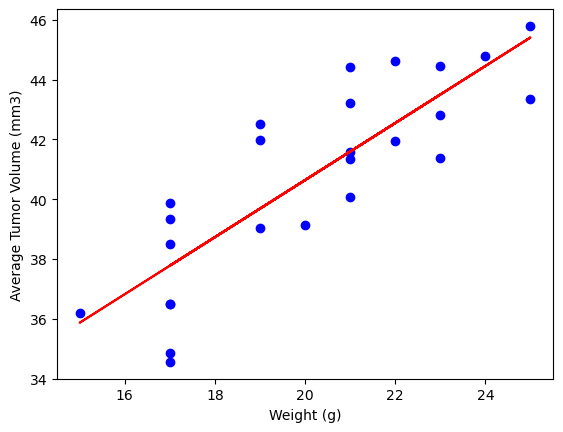

In [33]:
# Plotting linear regression line in a scatter plot
plt.scatter(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'], color='blue')
x_val = capomulin_avg_tumor['Weight (g)']
y_val = slope * x_val + intercept
plt.plot(x_val, y_val, color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()